In [1]:
#importing necessary packages
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn import decomposition
%matplotlib inline
sns.set(color_codes=True)
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [2]:
train_data = pd.read_csv("train.csv",index_col=0)
test_data = pd.read_csv("test.csv",index_col=0)
y_train = train_data["SalePrice"]
y_train = np.log1p(y_train)
#y_test = test_data[""]
del train_data["SalePrice"]
train_data['MSSubClass'] = train_data['MSSubClass'].astype(basestring)
data = pd.concat((train_data, test_data), axis=0)
allColumns = data.columns
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


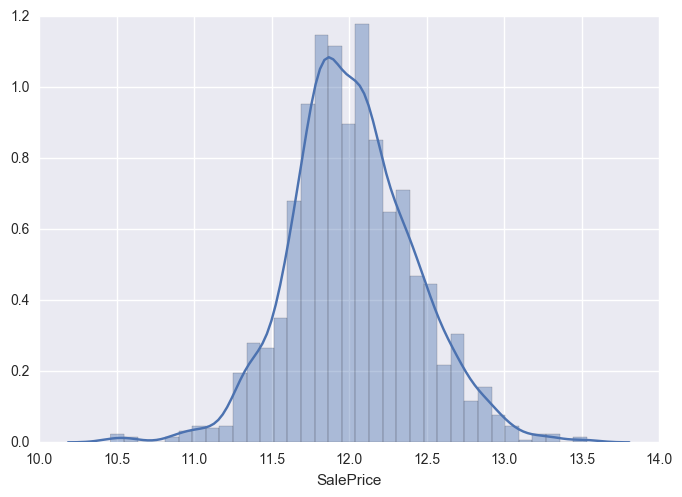

In [3]:
sns.distplot(y_train)

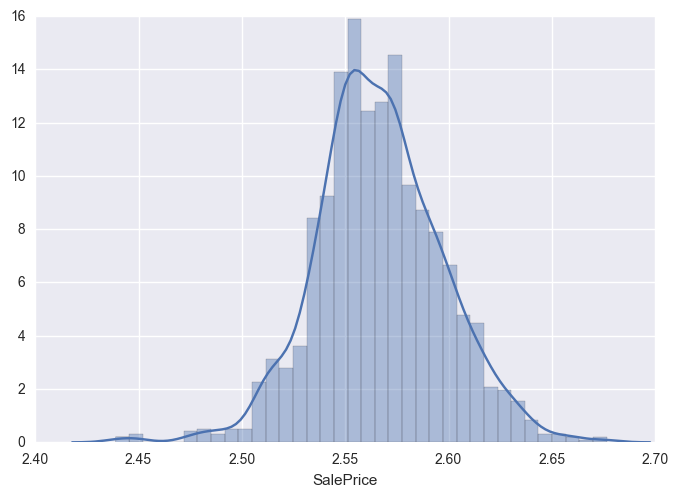

In [4]:
y_train = np.log1p(y_train)
sns.distplot(y_train)

In [5]:
#Removing missing values and relacing with mean values in all columns.
meancoldata = data.mean()
#meancoldata.head()
data = data.fillna(meancoldata)

In [6]:
#data = pd.get_dummies(data)
data = data[["MSSubClass","MSZoning","LotArea","LandContour","Neighborhood",
             "BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt",
             "YearRemodAdd","Exterior1st","Exterior2nd","MasVnrArea","ExterQual",
             "Foundation","BsmtQual","BsmtCond","BsmtFinType1","BsmtFinSF1",
            "BsmtFinType2","BsmtUnfSF","TotalBsmtSF","HeatingQC","CentralAir",
             "1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","FullBath",
             "HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd",
             "Functional","Fireplaces","FireplaceQu","GarageType","GarageYrBlt",
            "GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond",
             "PavedDrive","WoodDeckSF","OpenPorchSF","Fence"]]
#datapart2 = data[['1stFlrSF','2ndFlrSF']]
data = data.iloc[:,:20]

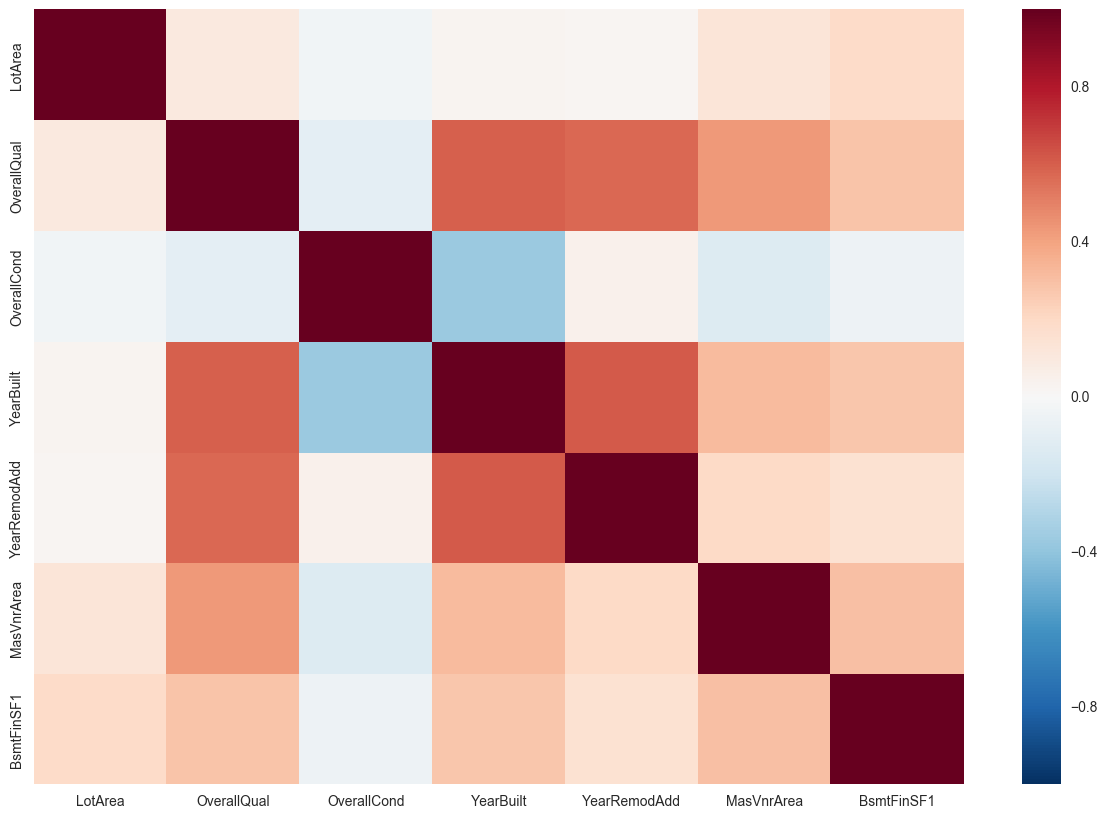

In [7]:
mpl.rcParams['figure.figsize'] = (15.0, 10.0)
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [48]:
#numeric_cols = data.columns[data.dtypes != 'object']

In [275]:
#numeric_cols

Index([u'LotArea', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1'],
      dtype='object')

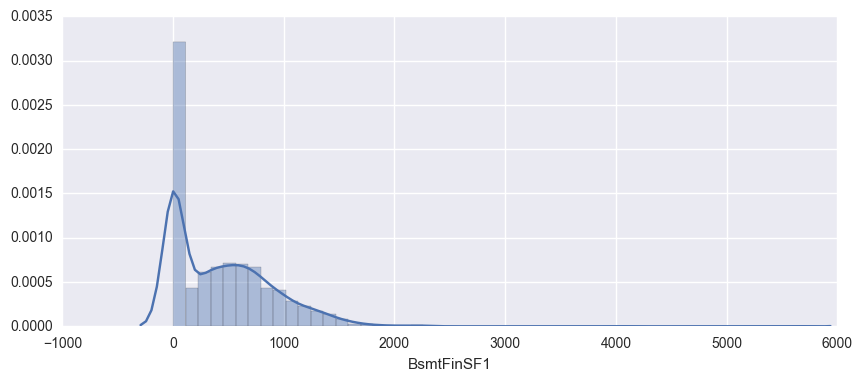

In [8]:
#Normalize this
mpl.rcParams['figure.figsize'] = (10.0, 4.0)
sns.distplot(data['BsmtFinSF1'])

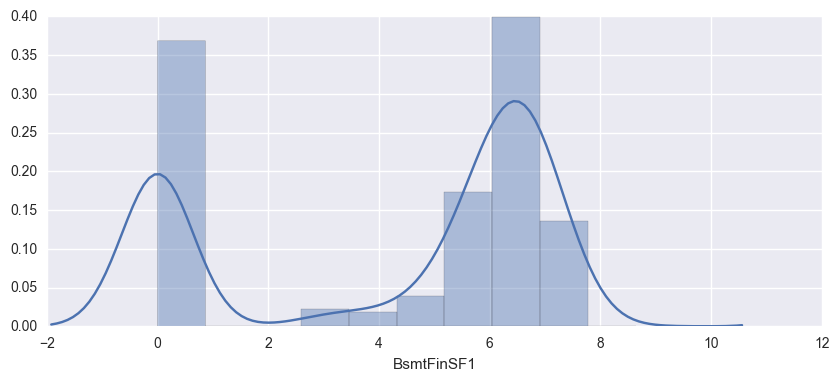

In [9]:
data['BsmtFinSF1'] = np.log1p(data['BsmtFinSF1'])
sns.distplot(data['BsmtFinSF1'])

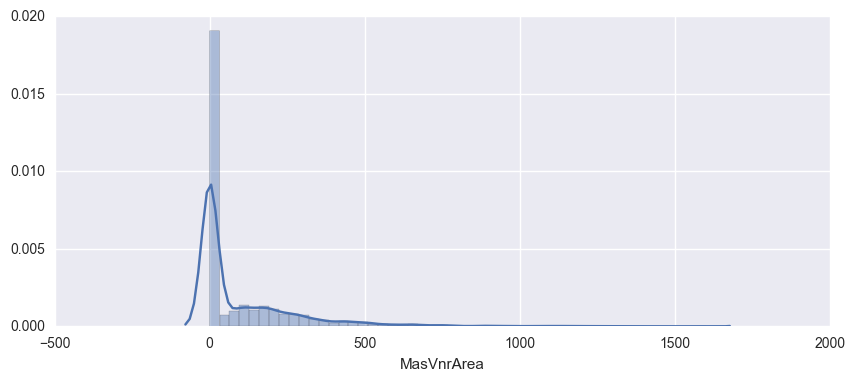

In [10]:
#take log this column
sns.distplot(data['MasVnrArea'])

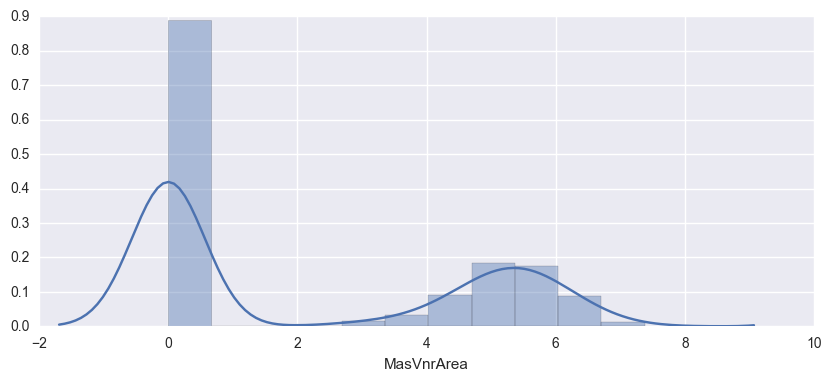

In [11]:
data['MasVnrArea'] = np.log1p(data['MasVnrArea'])
sns.distplot(data['MasVnrArea'])

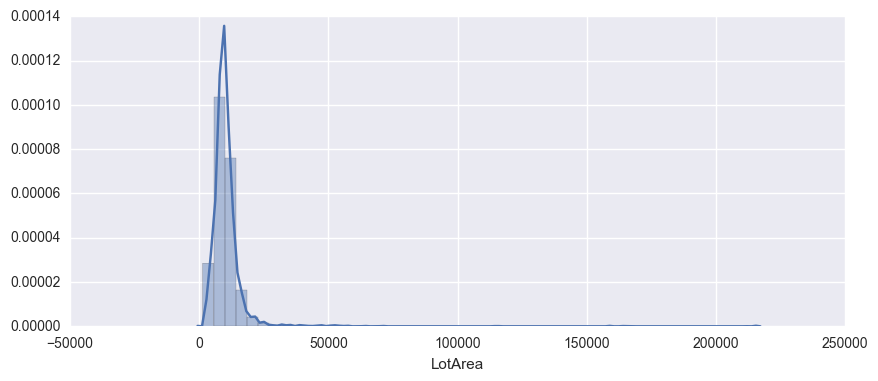

In [12]:
#Log transform LotArea as per below graph
mpl.rcParams['figure.figsize'] = (10.0, 4.0)
sns.distplot(data['LotArea'])

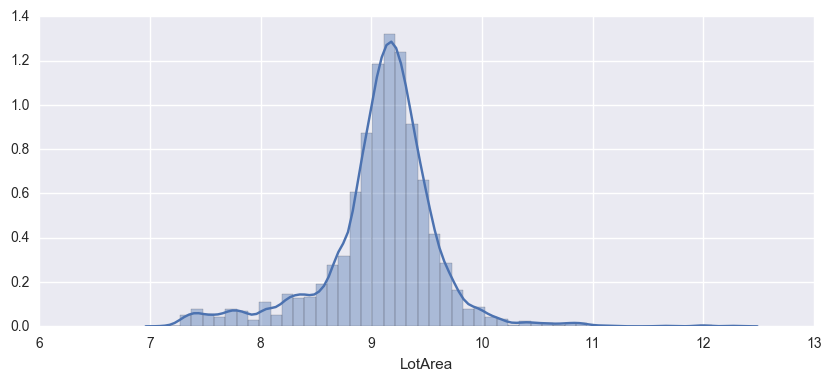

In [13]:
data['LotArea'] = np.log1p(data['LotArea'])
sns.distplot(data['LotArea'])

In [55]:
#Alpha to tune
#Lasso 
#alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
#Ridge
#alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]


In [14]:
X_train = data[:train_data.shape[0]]
test = data[train_data.shape[0]:]
X_train = pd.get_dummies(X_train,dummy_na=True)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LassoLarsCV
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [16]:
alpha_ridge = [1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 3, 5, 7, 10, 20, 30]
crossval_ridge = [np.mean(rmse_cv(Ridge(alpha=x,max_iter=1000))) for x in alpha_ridge]

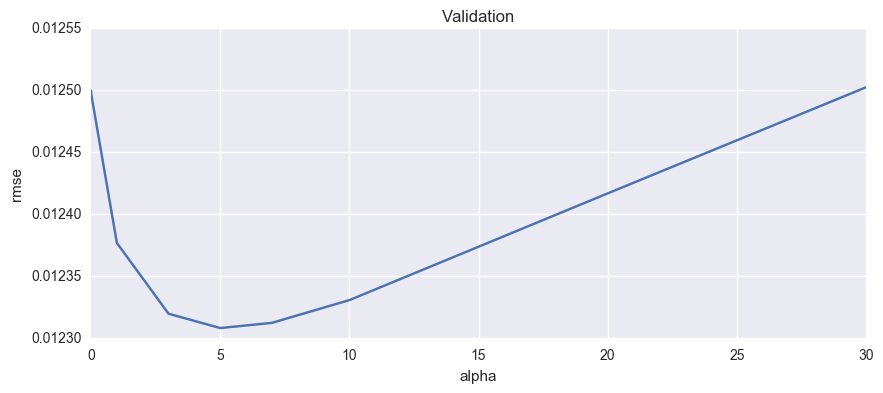

In [17]:
#https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
import matplotlib.pyplot as plt
crossval_ridge = pd.Series(crossval_ridge, index = alpha_ridge)
crossval_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [18]:
param_grid = [
  {'C': [1, 10, 50, 100, 500, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 50, 100, 500, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [19]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [20]:
reg = svm.SVR()
reg_cv = GridSearchCV(reg, param_grid,scoring='neg_mean_squared_error')
reg_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 50, 100, 500, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 50, 100, 500, 1000], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [21]:
reg_cv.best_score_ 

-0.00059824570930107313

In [22]:
reg_cv.best_params_

{'C': 1, 'kernel': 'linear'}

In [23]:
SVC_C = [.5,1,10,50,100]
crossval_SVR = [np.mean(rmse_cv(svm.SVR(kernel='linear',C=x))) for x in SVC_C]
print crossval_SVR

[0.023696293851792883, 0.023696293851792883, 0.023696293851792883, 0.023696293851792883, 0.023696293851792883]


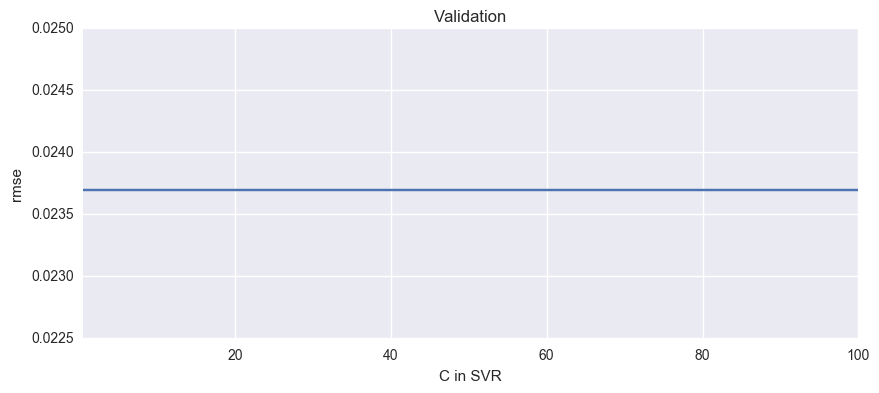

In [24]:
import matplotlib.pyplot as plt
crossval_ridge = pd.Series(crossval_SVR, index = SVC_C)
crossval_ridge.plot(title = "Validation")
plt.xlabel("C in SVR")
plt.ylabel("rmse")

In [25]:
#Lot of correlatations
pca = PCA(n_components=5,svd_solver = 'full',random_state=16)

In [26]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=16,
  svd_solver='full', tol=0.0, whiten=False)

In [27]:
print(pca.explained_variance_ratio_)

[ 0.81643259  0.16660485  0.00679218  0.00407739  0.00092808]


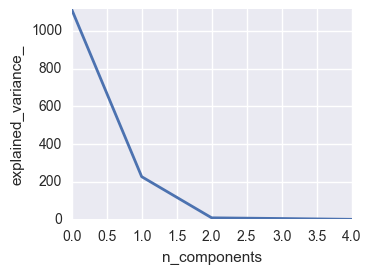

In [28]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [29]:
data_PCA = pca.transform(X_train)

In [31]:
def rmse_cv_PCA(model,tempdata):
    rmse= np.sqrt(-cross_val_score(model, tempdata, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [33]:
RMSE_error = []

In [34]:
alpha_ridge = [1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 3, 5, 7, 10]
crossval_ridge1 = [np.mean(rmse_cv_PCA(Ridge(alpha=x,max_iter=1000),data_PCA[:,:1])) for x in alpha_ridge]
crossval_ridge2 = [np.mean(rmse_cv_PCA(Ridge(alpha=x,max_iter=1000),data_PCA[:,:2])) for x in alpha_ridge]
crossval_ridge3 = [np.mean(rmse_cv_PCA(Ridge(alpha=x,max_iter=1000),data_PCA[:,:3])) for x in alpha_ridge]
crossval_ridge4 = [np.mean(rmse_cv_PCA(Ridge(alpha=x,max_iter=1000),data_PCA[:,:4])) for x in alpha_ridge]
crossval_ridge5 = [np.mean(rmse_cv_PCA(Ridge(alpha=x,max_iter=1000),data_PCA[:,:5])) for x in alpha_ridge]

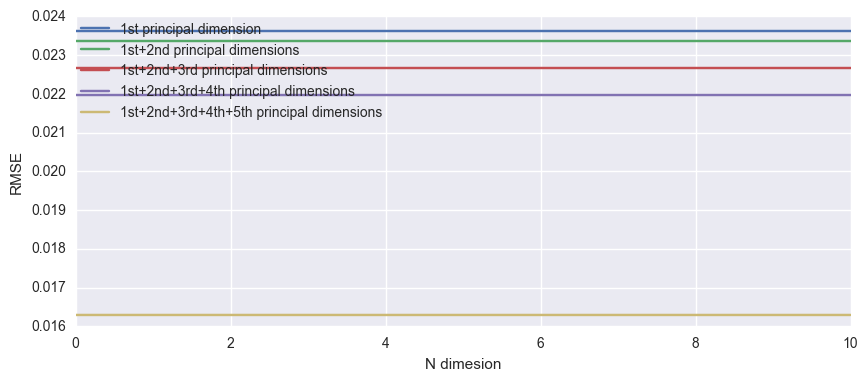

In [35]:
plt.plot(alpha_ridge, crossval_ridge1)
plt.plot(alpha_ridge, crossval_ridge2)
plt.plot(alpha_ridge, crossval_ridge3)
plt.plot(alpha_ridge, crossval_ridge4)
plt.plot(alpha_ridge, crossval_ridge5)
plt.xlabel('N dimesion')
plt.ylabel('RMSE')
plt.legend(['1st principal dimension', '1st+2nd principal dimensions', '1st+2nd+3rd principal dimensions', 
            '1st+2nd+3rd+4th principal dimensions','1st+2nd+3rd+4th+5th principal dimensions'], loc='upper left',
           borderaxespad=0.)
plt.show()